# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
import tensorflow as tf;
print(tf.__version__)


2.17.0


## Data Preprocessing

### Training Image preprocessing

In [39]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [40]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [41]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [48]:
cnn.add(tf.keras.layers.Flatten())

In [49]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [50]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [51]:
#Output Layer
cnn.add(tf.keras.layers.Dense(38, activation='softmax'))

### Compiling and Training Phase

In [52]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [53]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2007s 911ms/step - accuracy: 0.3980 - loss: 2.1214 - val_accuracy: 0.8518 - val_loss: 0.4948
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1989s 905ms/step - accuracy: 0.8323 - loss: 0.5328 - val_accuracy: 0.8983 - val_loss: 0.3186
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1866s 849ms/step - accuracy: 0.9017 - loss: 0.2993 - val_accuracy: 0.9332 - val_loss: 0.2081
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1891s 861ms/step - accuracy: 0.9341 - loss: 0.2003 - val_accuracy: 0.9351 - val_loss: 0.1981
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4804s 2s/step - accuracy: 0.9505 - loss: 0.1472 - val_accuracy: 0.9581 - val_loss: 0.1292
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1802s 820ms/step - accuracy: 0.9626 - loss: 0.1100 - val_accuracy: 0.9607 - val_loss: 0.1201
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1892s 861ms/step - accuracy: 0.9687 - loss: 0.0932 - val_accuracy: 0.9588 - val_loss: 0.1325
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2015s 917ms/step

## Evaluating Model

In [55]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 477s 217ms/step - accuracy: 0.9940 - loss: 0.0176
Training accuracy: 0.9949356317520142


In [56]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 215ms/step - accuracy: 0.9742 - loss: 0.0808
Validation accuracy: 0.9727407097816467


### Saving Model

In [57]:
cnn.save('trained_plant_disease_model.keras')

In [58]:
training_history.history #Return Dictionary of history

{'accuracy': [0.596699595451355,
  0.8540579080581665,
  0.9112738966941833,
  0.938245952129364,
  0.9534817337989807,
  0.9640088081359863,
  0.9702966213226318,
  0.9765132665634155,
  0.9788036346435547,
  0.9828864336013794],
 'loss': [1.3612525463104248,
  0.46038031578063965,
  0.27282339334487915,
  0.1881382167339325,
  0.13862337172031403,
  0.10726168751716614,
  0.08957084268331528,
  0.0714344009757042,
  0.06415686756372452,
  0.052546314895153046],
 'val_accuracy': [0.8518096804618835,
  0.8983041048049927,
  0.9331891536712646,
  0.9351240396499634,
  0.9581151604652405,
  0.9606760740280151,
  0.9587981104850769,
  0.9676189422607422,
  0.9642044305801392,
  0.9727407097816467],
 'val_loss': [0.4947623908519745,
  0.31858596205711365,
  0.20806826651096344,
  0.19810546934604645,
  0.12917587161064148,
  0.12008731812238693,
  0.13247299194335938,
  0.10710786283016205,
  0.11658206582069397,
  0.08603160828351974]}

In [59]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

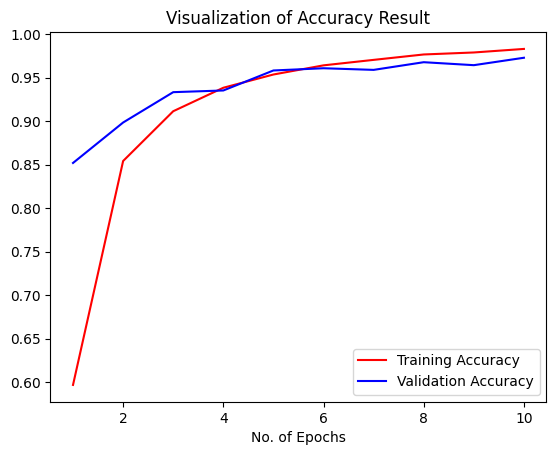

In [61]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [62]:
class_name = validation_set.class_names

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17605 files belonging to 39 classes.


In [64]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17605/17605 ━━━━━━━━━━━━━━━━━━━━ 309s 18ms/step


In [65]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [66]:
Y_true

<tf.Tensor: shape=(17605,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38], dtype=int64)>

In [67]:
predicted_categories

<tf.Tensor: shape=(17605,), dtype=int64, numpy=array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)>

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [73]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       504
           1       1.00      0.97      0.98       497
           2       0.98      0.96      0.97       440
           3       0.97      0.97      0.97       502
           4       0.96      0.99      0.98       454
           5       0.99      0.99      0.99       421
           6       0.99      0.99      0.99       456
           7       0.96      0.90      0.93       410
           8       0.99      0.99      0.99       477
           9       0.92      0.98      0.95       477
          10       0.99      1.00      0.99       465
          11       0.99      0.99      0.99       472
          12       0.99      1.00      0.99       480
          13       0.99      1.00      1.00       430
          14       1.00      1.00      1.00       423
          15       0.99      0.98      0.99       503
          16       0.98      0.98      0.98       459
          17       0.97    

c:\Users\rambh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rambh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rambh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Confusion Matrix Visualization

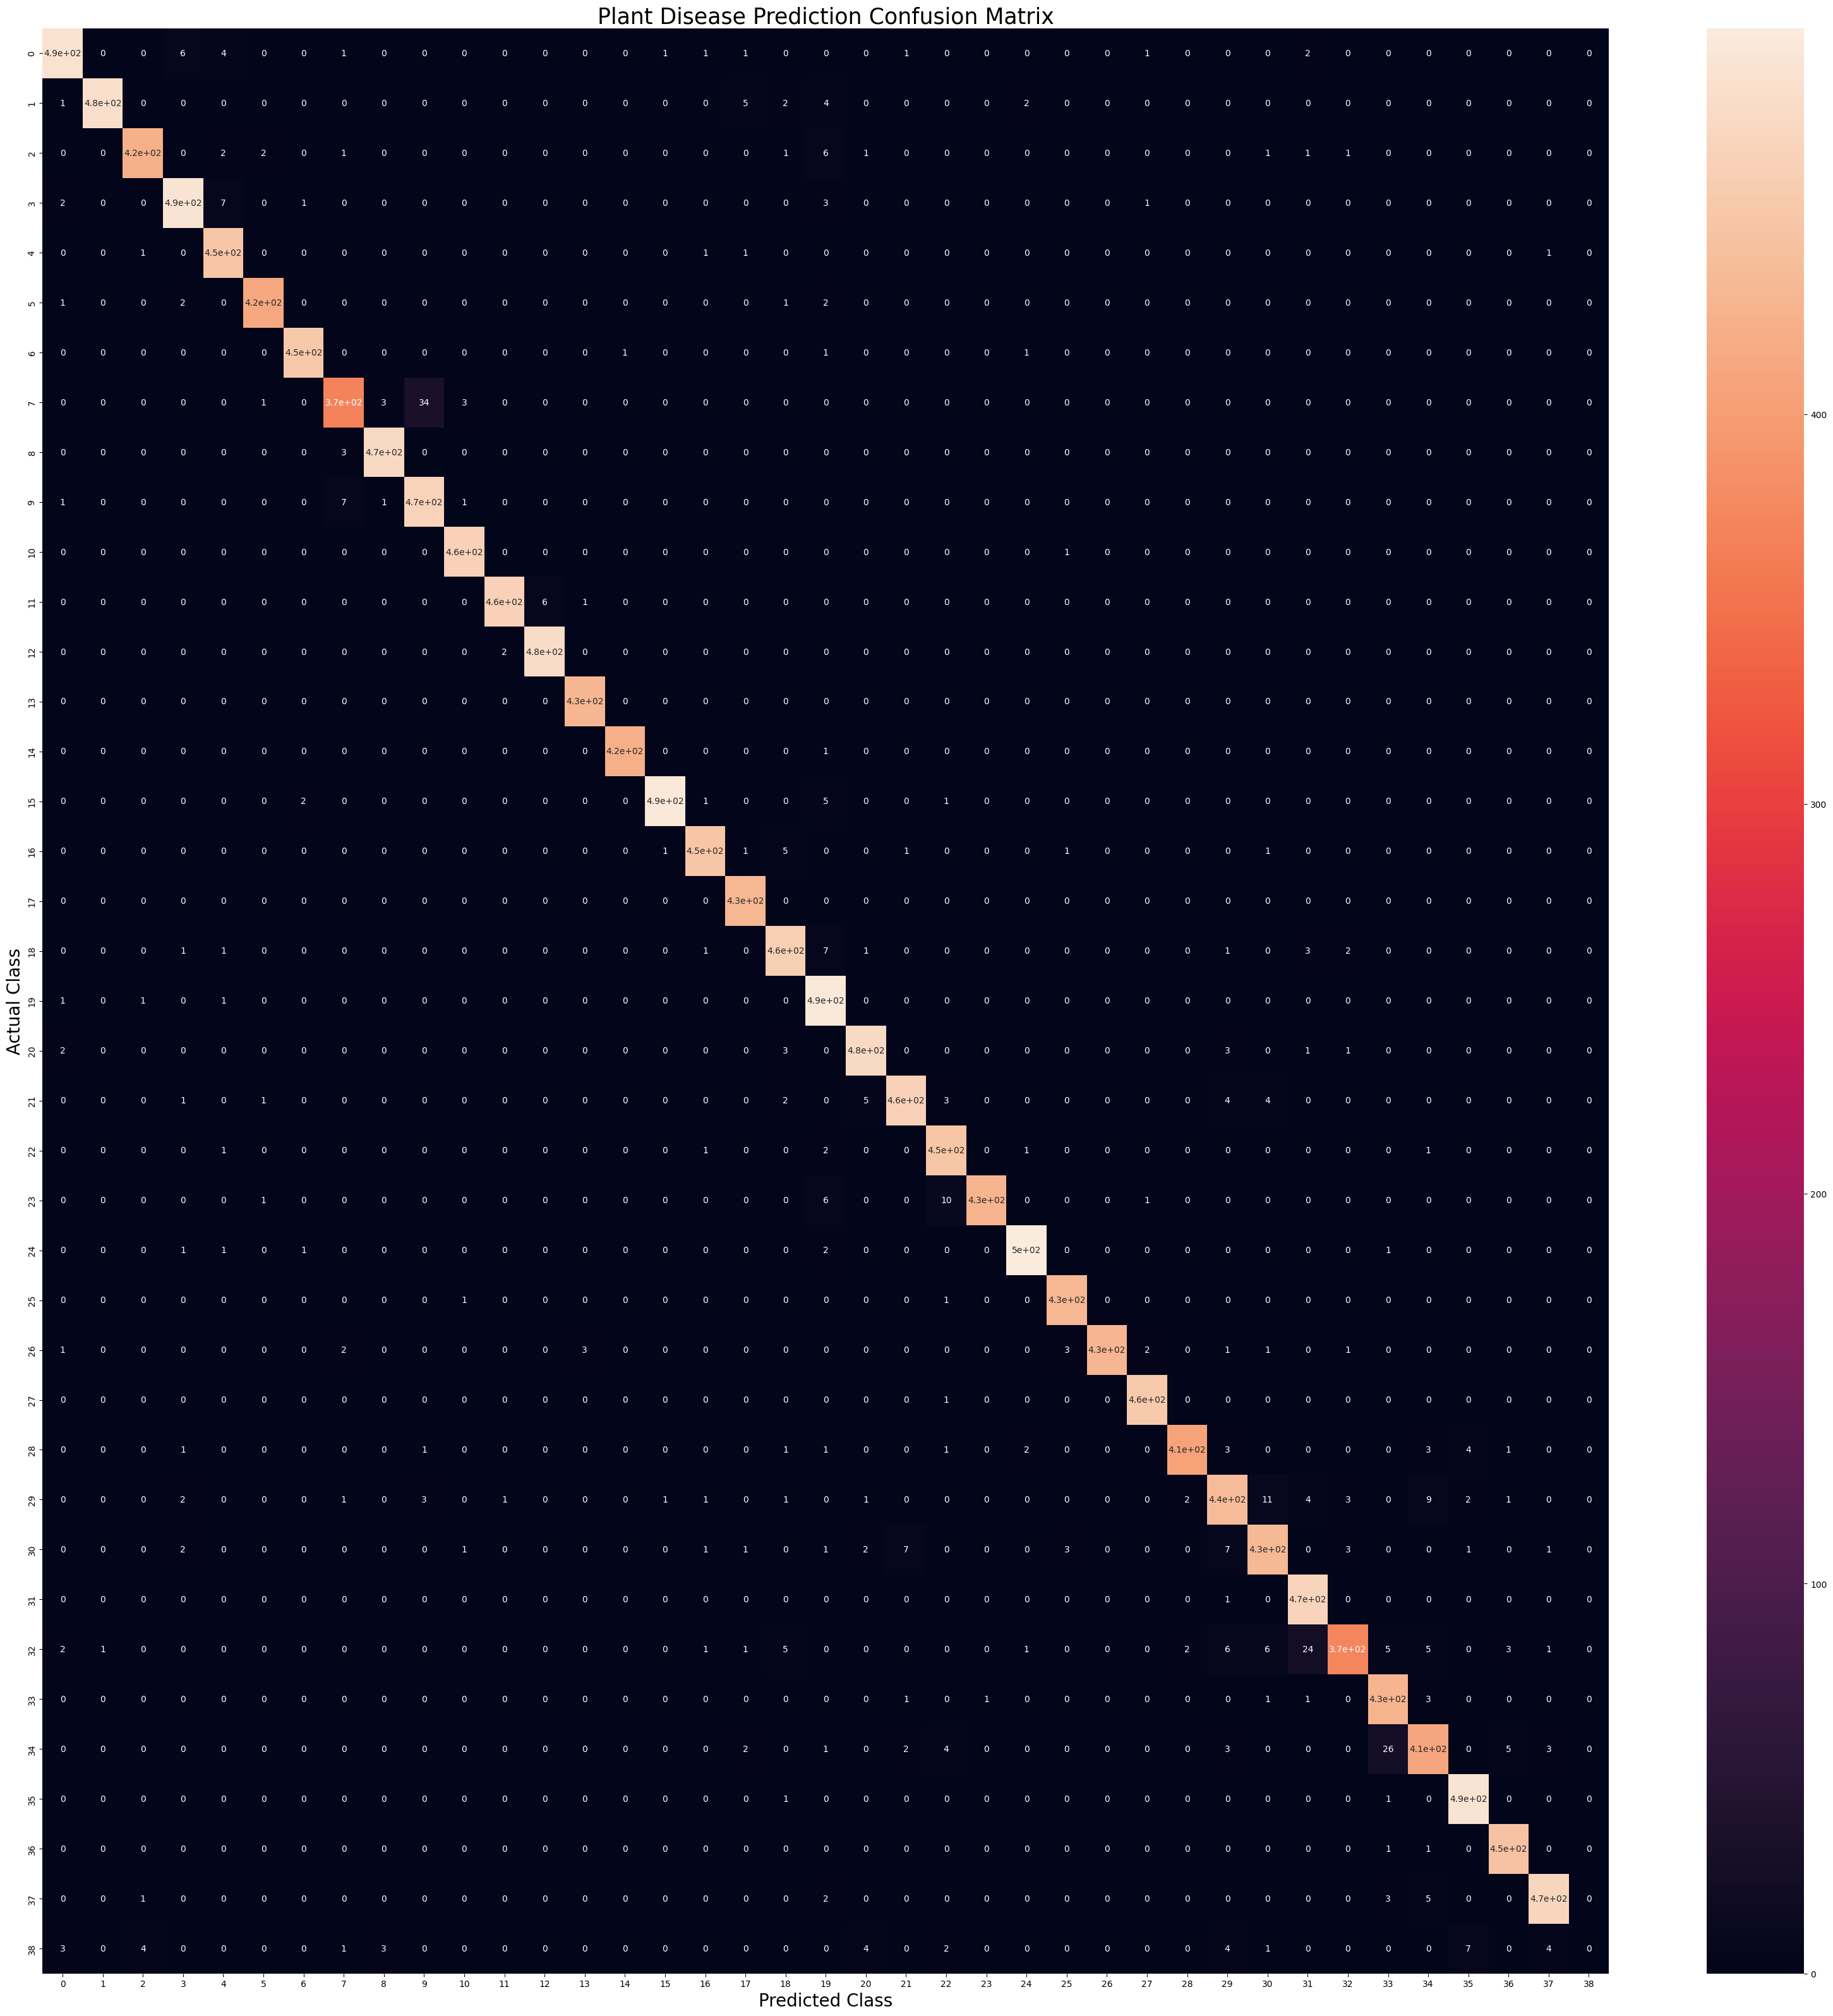

In [74]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()